# Exploring Wikipedia: Web Scraping, Data Cleaning, and Visualization

In this mini-project, I dive into web scraping by collecting article titles, texts, and links from Wikipedia using requests and BeautifulSoup.
After cleaning and organizing the data into a pandas DataFrame, I explore it through basic text analysis and visualizations.
The goal is to get hands-on experience with real-world HTML parsing, text preprocessing, and simple but insightful data visualization.

# Web Scraping

In [1]:
#Start by importing the necessary Python libraries for web scraping, data processing, and visualization:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#send an HTTP request to a Wikipedia page, retrieve its HTML content, and parse it using BeautifulSoup.

url = 'https://en.wikipedia.org/wiki/List_of_cities_with_over_one_million_inhabitants'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of cities with over one million inhabitants - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limit

In [4]:
#Using this function (find_all), we find a table on the page and select the one we need.

table = soup.find_all('table')[0]
print(table)

<table class="static-row-numbers plainrowheaders vertical-align-top sticky-header sortable wikitable">
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th>City
</th>
<th>Country
</th>
<th>Inhabitants
</th>
<th>Continent
</th>
<th>Year
</th>
<th>City definition
</th></tr>
<tr>
<td><a href="/wiki/Shanghai" title="Shanghai">Shanghai</a>
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/40px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/60px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span>China
</td>
<td align="right">21,909,814
</td>
<td>Asia
</td>
<td>2020<sup 

In [5]:
#From the parsed HTML, we extract the article title

titles = table.find_all('th')
print(titles)

[<th>City
</th>, <th>Country
</th>, <th>Inhabitants
</th>, <th>Continent
</th>, <th>Year
</th>, <th>City definition
</th>]


In [6]:
#This data will later be organized into a structured format.

table_titles = [title.text.strip() for title in titles]

print(table_titles)

['City', 'Country', 'Inhabitants', 'Continent', 'Year', 'City definition']


In [7]:
df=pd.DataFrame(columns=table_titles)
df

Empty DataFrame
Columns: [City, Country, Inhabitants, Continent, Year, City definition]
Index: []

In [8]:
#extract main text content

column_data = table.find_all('tr')

In [9]:
#organize the scraped information into a pandas DataFrame for easier manipulation and analysis.

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

After I managed to do web scraping and put the data into a DataFrame, we move on to cleaning the data.

# Data Cleaning

In [10]:
df

City   Country Inhabitants      Continent        Year  \
0     Shanghai     China  21,909,814           Asia     2020[1]   
1        Delhi     India  20,591,874           Asia  2021[2][3]   
2      Karachi  Pakistan  20,382,881           Asia     2023[4]   
3      Beijing     China  18,960,744           Asia     2020[1]   
4     Shenzhen     China  17,444,609           Asia     2020[1]   
..         ...       ...         ...            ...         ...   
458   Edmonton    Canada   1,010,899  North America   2021[229]   
459      Odesa   Ukraine   1,010,537         Europe   2022[230]   
460     Raipur     India   1,010,087           Asia     2011[2]   
461  Vientiane      Laos   1,009,300           Asia   2023[231]   
462       Kota     India   1,001,365           Asia     2011[2]   

                           City definition  
0              Province-level city (urban)  
1    Municipal corporation/Union territory  
2                 Metropolitan corporation  
3              Province-level city (urban)  
4              Sub-provincial City (urban)  
..                                     ...  
458                                   City  
459                    Municipality (city)  
460                  Municipal corporation  
461              Province-level Prefecture  
462                  Municipal corporation  

[463 rows x 6 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 462
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             463 non-null    object
 1   Country          463 non-null    object
 2   Inhabitants      463 non-null    object
 3   Continent        463 non-null    object
 4   Year             463 non-null    object
 5   City definition  463 non-null    object
dtypes: object(6)
memory usage: 25.3+ KB


In [12]:
df.isnull().sum()

City               0
Country            0
Inhabitants        0
Continent          0
Year               0
City definition    0
dtype: int64

In [13]:
#Cleaning "Year" and "Inhabitants" columns by removing extra symbols and converting to integers.

df["Year"] = df["Year"].str.replace(r'\[[^\]]*\]', '', regex=True).astype(int)
df['Inhabitants']=df['Inhabitants'].str.replace(',','',regex=True).astype(int)

In [14]:
df.head()

City   Country  Inhabitants Continent  Year  \
0  Shanghai     China     21909814      Asia  2020   
1     Delhi     India     20591874      Asia  2021   
2   Karachi  Pakistan     20382881      Asia  2023   
3   Beijing     China     18960744      Asia  2020   
4  Shenzhen     China     17444609      Asia  2020   

                         City definition  
0            Province-level city (urban)  
1  Municipal corporation/Union territory  
2               Metropolitan corporation  
3            Province-level city (urban)  
4            Sub-provincial City (urban)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 462
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             463 non-null    object
 1   Country          463 non-null    object
 2   Inhabitants      463 non-null    int32 
 3   Continent        463 non-null    object
 4   Year             463 non-null    int32 
 5   City definition  463 non-null    object
dtypes: int32(2), object(4)
memory usage: 21.7+ KB


In [16]:
df['City definition'].value_counts()

City definition
Prefecture-level city (urban)            103
Municipality (city)                       65
Municipal corporation                     48
City                                      28
Municipio                                 25
                                        ... 
Directly governed city                     1
City[71]                                   1
Municipal corporation/Union territory      1
Sovereign state                            1
Province-level Prefecture                  1
Name: count, Length: 69, dtype: int64

# Data Visualization


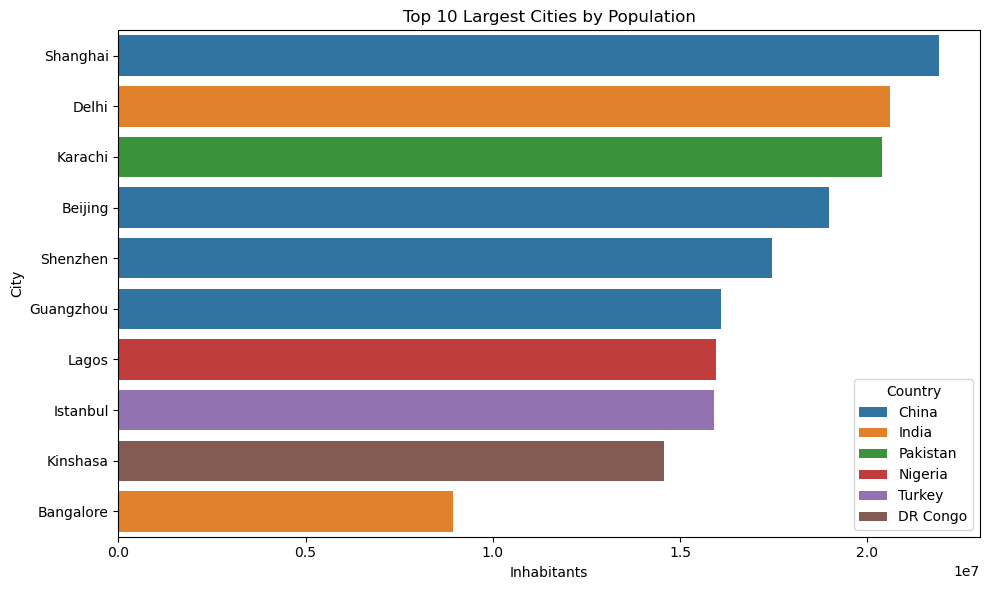

In [17]:
#barplot

plt.figure(figsize=(10, 6))
sns.barplot(data=df.head(10), y="City", x="Inhabitants", hue="Country", dodge=False)
plt.title("Top 10 Largest Cities by Population")
plt.xlabel("Inhabitants")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [18]:
df["Continent"].value_counts()

Continent
Asia             301
Africa            66
Europe            32
South America     31
North America     31
Asia/Europe        1
Oceania            1
Name: count, dtype: int64

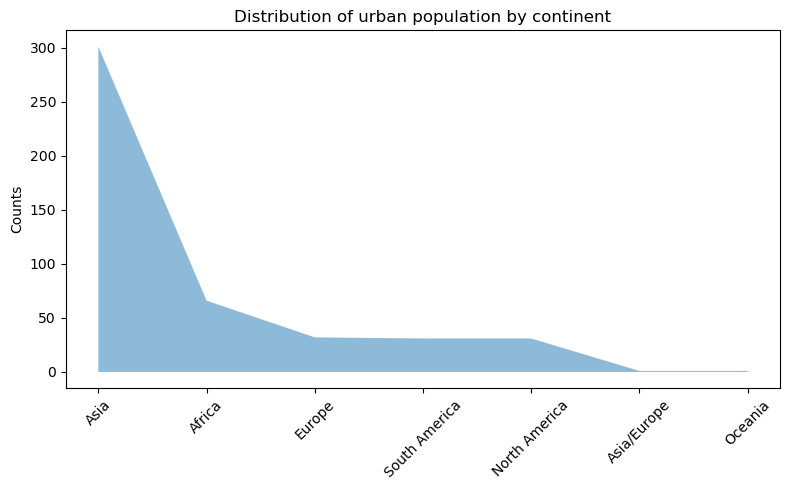

In [19]:
#areaplot

Continent_counts = df["Continent"].value_counts()

plt.figure(figsize=(8, 5))
plt.fill_between(range(len(Continent_counts)), Continent_counts.values, alpha=0.5)
plt.xticks(ticks=range(len(Continent_counts)), labels=Continent_counts.index, rotation=45)
plt.title("Distribution of urban population by continent")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

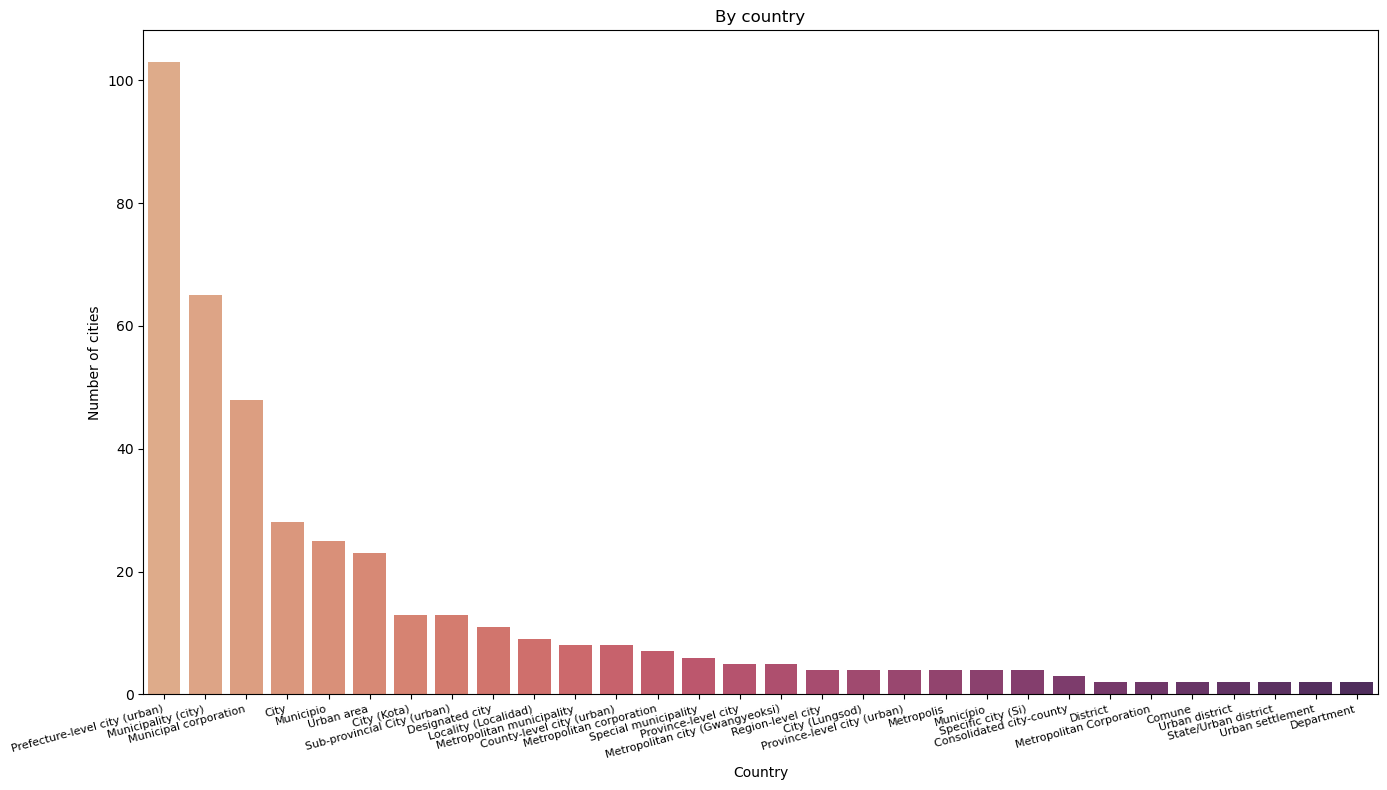

In [20]:
#barchart

City_definition_counts = df['City definition'].value_counts().head(30)


plt.figure(figsize=(14, 8))
sns.barplot(x=City_definition_counts.index, y=City_definition_counts.values, palette="flare")

plt.title("By country")
plt.xlabel("Country")
plt.ylabel("Number of cities")
plt.xticks(rotation=15, ha='right', fontsize=8)
plt.tight_layout()
plt.show()



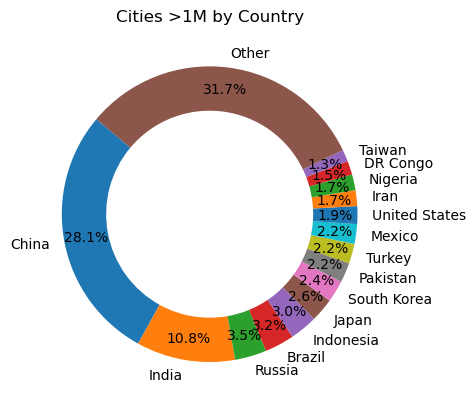

In [21]:
#circlechart

Country_counts = df["Country"].value_counts()
top_counts = Country_counts.nlargest(15)
top_counts["Other"] = Country_counts.iloc[15:].sum()


top_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    wedgeprops={'width':0.3}
)
plt.title('Cities >1M by Country')
plt.ylabel('')
plt.show()

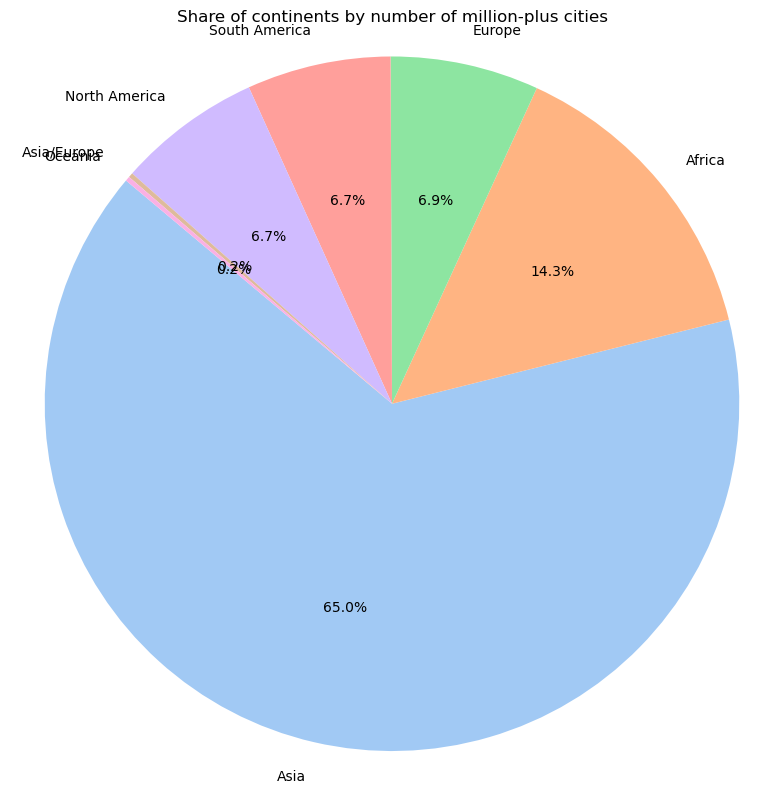

In [22]:
#pieplot

Continent_counts = df["Continent"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Continent_counts, labels=Continent_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Share of continents by number of million-plus cities")
plt.axis('equal')
plt.tight_layout()
plt.show()


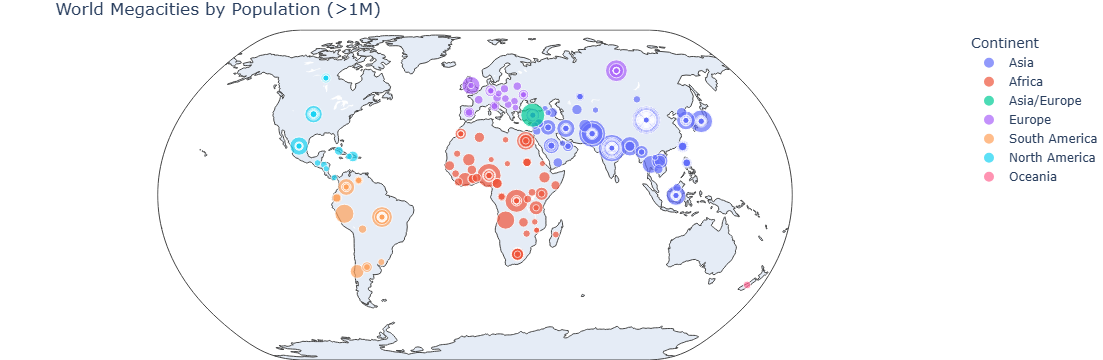

In [23]:
#scatterplot

import plotly.express as px

# build a map by countries
fig = px.scatter_geo(
    df,
    locations="Country",
    locationmode="country names",
    size="Inhabitants",
    color="Continent",
    hover_name="City",
    projection="natural earth"
)

fig.update_layout(
    title="World Megacities by Population (>1M)",
    geo=dict(showland=True),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

# Conclusion
The DataFrame and scatter plot reveal that Asia hosts the most cities with over one million inhabitants (270), driven by China and India, with Shanghai and Delhi as the largest. Africa follows (~65 cities), with Lagos and Kinshasa as key hubs. Europe, South America, and North America each have ~30–32 megacities, with Moscow, São Paulo, and Mexico City as their largest, respectively. Oceania is minimally represented with only Auckland.

The interactive plotly visualization effectively communicates these trends, using point size for population and color for continents. However, the notebook would benefit from explicitly showing the DataFrame creation code and adding summary statistics (e.g., top 10 cities, continent-wise counts) to enhance insights.